In [128]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#### Do your work in whatever format you feel most comfortable with (notebook, repl, etc). Get the data from the_data.csv into a data frame (you can click the "Raw" button in the upper left corner to download the data).

In [41]:
df = pd.read_csv("https://gist.githubusercontent.com/zgulde/96991fedca29ff5371f5e7fa00d3fa95/raw/3e95d04e4ae544bf7b03b89dfde002ff502260a1/the_data.csv")

#### Make sure timestamp is a datetime type and set it as the index.

In [42]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
timestamp    48 non-null object
x            48 non-null float64
y            48 non-null object
dtypes: float64(1), object(2)
memory usage: 1.2+ KB


,timestamp,x,y
0,2018-04-30 00:00:00,1.84,A
1,2018-04-30 01:00:00,1.47,C
2,2018-04-30 02:00:00,0.20,B
3,2018-04-30 03:00:00,0.17,C
4,2018-04-30 04:00:00,2.06,C


In [43]:
df.timestamp = pd.to_datetime(df.timestamp)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
timestamp    48 non-null datetime64[ns]
x            48 non-null float64
y            48 non-null object
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.2+ KB


In [47]:
df = df.set_index("timestamp")

In [48]:
df.head()

,x,y
timestamp,,
2018-04-30 00:00:00,1.84,A
2018-04-30 01:00:00,1.47,C
2018-04-30 02:00:00,0.20,B
2018-04-30 03:00:00,0.17,C
2018-04-30 04:00:00,2.06,C


#### By Group

- What is the maximum x value for group B?
- What is the average x value for group A?
- What is the minimum x value for group C?
- Which group has the highest sum of x values?

In [49]:
df.y.value_counts()

A    18
C    17
B    13
Name: y, dtype: int64

In [61]:
df [df.y == "B"].x.max()

1.91

In [51]:
df [df.y == "A"].x.mean()

-0.11055555555555556

In [52]:
df [df.y == "C"].x.min()

-1.83

In [119]:
for group in sorted(df.y.unique()):
    print("Sum of group " + group)
    print(df [df.y == group].x.sum())

Sum of group A
-1.99
Sum of group B
-0.7000000000000002
Sum of group C
3.95


> Group C has the largest sum of x-values

#### Time Aggregates

- What is the sum of the x values for 2018-05-01?
- What is the average x value for each day? The median?
- Which day has the largest x value?
- Which day has the smallest x value for group C?

In [84]:
df.resample("D").sum().loc["2018-05-01"]

x   -4.02
Name: 2018-05-01 00:00:00, dtype: float64

In [88]:
df.resample("D").agg(["mean","median"])

x       
              mean median
timestamp                
2018-04-30  0.2200  0.175
2018-05-01 -0.1675  0.220

In [106]:
df.resample("D").x.max().sort_values().tail(1)

timestamp
2018-04-30    2.06
Name: x, dtype: float64

In [113]:
df [df.y == "C"].resample("D").min().x.sort_values().head(1)

timestamp
2018-05-01   -1.83
Name: x, dtype: float64

#### Visualization

- Visualize the minimum x value of each group with a bar chart.
- Visualize x over time.
- Visualize x over time by y value.

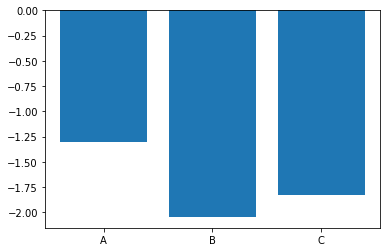

In [145]:
plt.bar(x=["A","B","C"], height=[df[df.y=="A"].x.min(), df[df.y=="B"].x.min(), df[df.y=="C"].x.min()])
plt.show()

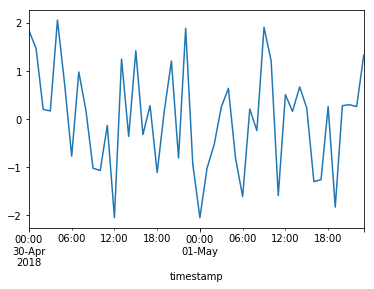

In [129]:
df.x.plot()
plt.show()

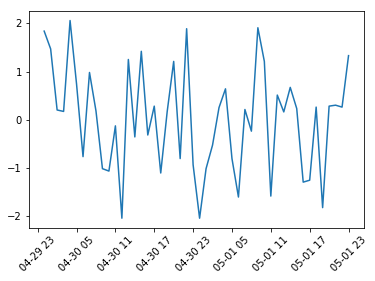

In [174]:
sns.lineplot(data=df.x)
plt.xticks(rotation=45)
plt.show()

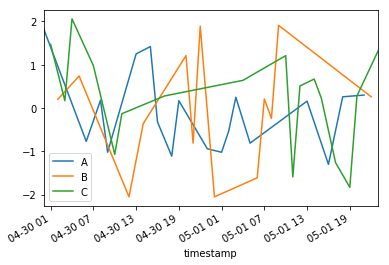

In [172]:
for group in sorted(df.y.unique()):
    df [df.y == group].x.plot()
plt.legend("ABC")
plt.show()

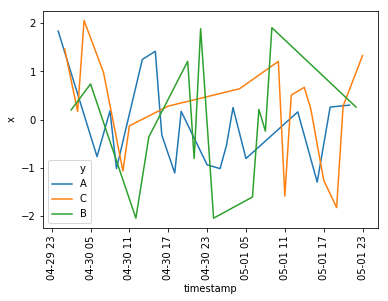

In [166]:
sns.lineplot(data=df.reset_index(), x="timestamp", y="x",hue="y")
plt.xticks(rotation=90)
plt.show()

#### More Aggregation

- What is the least frequent y value for 2018-04-30?
- What is the most frequent y value for each day?

In [190]:
df [df.index.strftime("%Y-%m-%d") == "2018-04-30"].y.value_counts()

A    10
B     7
C     7
Name: y, dtype: int64

In [207]:
pd.crosstab(df.index, df.y).resample("D").sum()

y,A,B,C
row_0,,,
2018-04-30,10,7,7
2018-05-01,8,6,10
